In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xarray as xr
import warnings
from scipy import stats
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

C:\Users\somen\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\somen\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [44]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)

#3939840 ~ 4Million data points

In [25]:
norm = xr.load_dataset('data\\VerySmallDataset\\000_norm.nc')

In [5]:
ds = xr.load_dataset('data//VerySmallDataset/000_train.nc')

In [5]:
labels = [(np.where(ds.var_names == x),x) for x in ['TBP', 'QBP', 'PS', 'SOLIN', 'SHFLX', 'LHFLX','PRECT']]

In [6]:
labels

[((array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
          47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64),),
  'TBP'),
 ((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
          17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64),),
  'QBP'),
 ((array([60], dtype=int64),), 'PS'),
 ((array([61], dtype=int64),), 'SOLIN'),
 ((array([62], dtype=int64),), 'SHFLX'),
 ((array([63], dtype=int64),), 'LHFLX'),
 ((array([128], dtype=int64),), 'PRECT')]

### Assumed Spatial and Temporal independence

Text(0, 0.5, 'Precipitation (mm/day)')

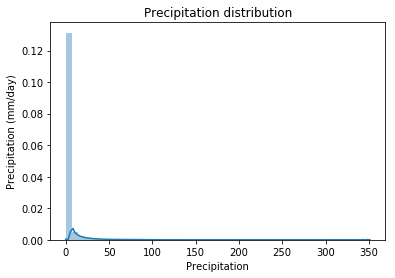

In [7]:
prect = pd.Series(ds['vars'][:,128] * 86400000, name="Precipitation") #mm/day
chart_prect = sns.distplot(prect)
chart_prect.set_title('Precipitation distribution')
chart_prect.set_ylabel('Precipitation (mm/day)')

1mm rainfall means every one square meter area is filled with the water of height 1mm.
1 square meter = 1000mm length ×1000mm breath
So 1mm rain means 1000mm length × 1000mm breath × 1mm height = 1litre of water.
Every square meter has one litre of water
In laymen language:
Take a vessel of 1 square meter in dimention and keep it in an open space during rain, you will be having 1mm height of water in it that is 1 litre of water in it at the end of the rain.

Text(0, 0.5, 'PS (surface pressure in Pa, 1 variable)')

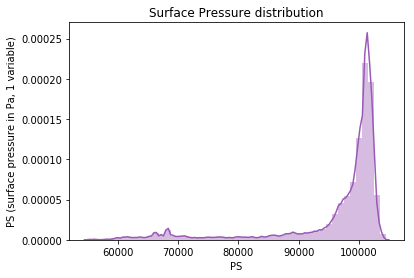

In [56]:
pressure = pd.Series(ds['vars'][:,60], name="PS") 
chart_press = sns.distplot(pressure)
chart_press.set_title('Surface Pressure distribution')
chart_press.set_ylabel('PS (surface pressure in Pa, 1 variable)')

Text(0, 0.5, 'SOLIN')

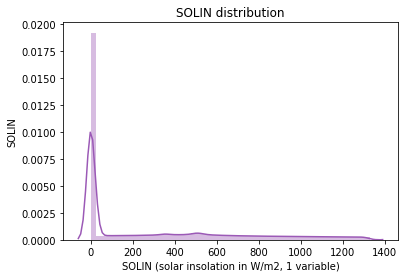

In [59]:
pressure = pd.Series(ds['vars'][:,61], name="SOLIN (solar insolation in W/m2, 1 variable)") 
chart_solin= sns.distplot(pressure)
chart_solin.set_title('SOLIN distribution')
chart_solin.set_ylabel('SOLIN')

Text(0, 0.5, 'SHFLX')

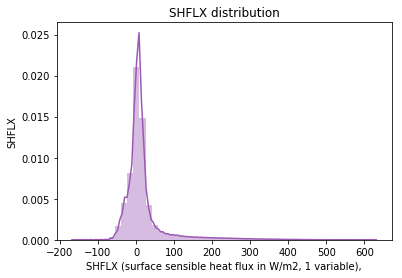

In [62]:
shflx = pd.Series(ds['vars'][:,62], name="SHFLX (surface sensible heat flux in W/m2, 1 variable),") 
chart_shflx = sns.distplot(pressure)
chart_shflx.set_title('SHFLX distribution')
chart_shflx.set_ylabel('SHFLX')

Text(0, 0.5, 'LHFLX')

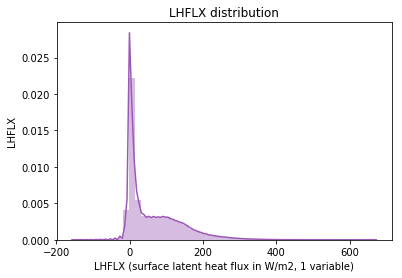

In [63]:
lhflx = pd.Series(ds['vars'][:,63], name="LHFLX (surface latent heat flux in W/m2, 1 variable)") 
chart_lhflx = sns.distplot(lhflx)
chart_lhflx.set_title('LHFLX distribution')
chart_lhflx.set_ylabel('LHFLX')

"
Yes: Most of the water condenses in the troposphere (lowest layer of the atmosphere with pressures lev usually below 150hPa ), which means that TBP[:12] and QBP[:12] should have a minor influence on PRECT compared to TBP[12:30] and QBP[12:30]
"

Text(0.5, 1.0, 'TBP, Level 0-11 (Higher layers (Far away from surface))')

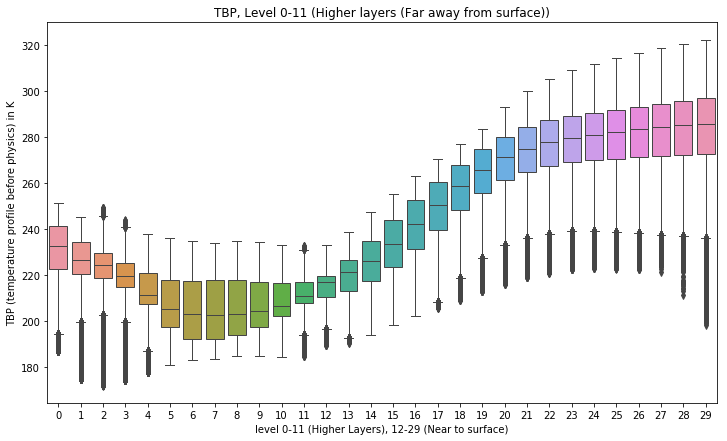

In [47]:
"TBP : Range [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]"
rand_idx = np.random.randint(0,3939840, 100000)
TBP = pd.DataFrame(np.array(ds['vars'][rand_idx,np.arange(30)+[30]])).melt()

TBP['High_Low'] = TBP["variable"].apply(lambda x : "Higher Layers" if x < 12 else "Lower layers Nearer to surface")



plt.figure(figsize=(12,7))
ax = sns.boxplot(x="variable", y="value",
               data=TBP, linewidth=1)
ax.set_xlabel("level 0-11 (Higher Layers), 12-29 (Near to surface)")
ax.set_ylabel("TBP (temperature profile before physics) in K")
ax.set_title("TBP, Level 0-11 (Higher layers (Far away from surface))")

Text(0.5, 1.0, 'QBP, Level 0-11 (Higher layers (Far away from surface))')

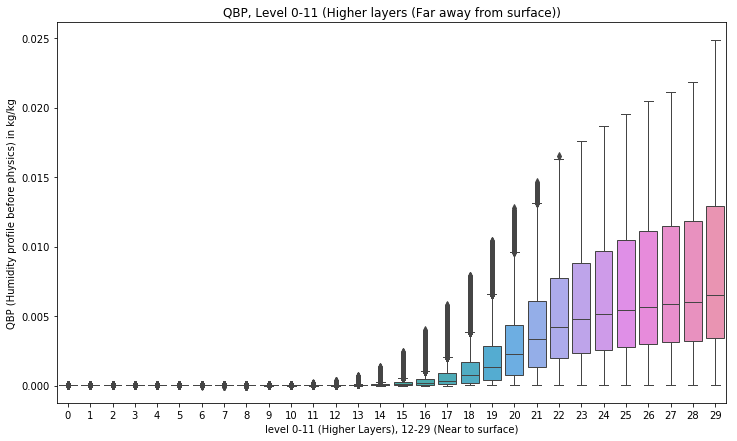

In [48]:
#(specific humidity profile before physics in kg/kg, 30 variables),
QBP = pd.DataFrame(np.array(ds['vars'][rand_idx,np.arange(0,30)])).melt()

QBP['High_Low'] = QBP["variable"].apply(lambda x : "Higher Layers" if x < 12 else "Lower layers Nearer to surface")

plt.figure(figsize=(12,7))
ax = sns.boxplot(x="variable", y="value",
               data= QBP, linewidth=1)
ax.set_xlabel("level 0-11 (Higher Layers), 12-29 (Near to surface)")
ax.set_ylabel("QBP (Humidity profile before physics) in kg/kg")
ax.set_title("QBP, Level 0-11 (Higher layers (Far away from surface))")